In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn import svm
from sklearn.svm import SVC

In [2]:
forest=pd.read_csv("C:/Users/LENOVO/Desktop/SVM/forestfires.csv")
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [3]:
forest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
forest.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [5]:
forest[forest.duplicated()]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [8]:
# lets remove week and month
x=forest.iloc[:,2:30]
y=forest.iloc[:,30]

In [9]:
x.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40
area,517.0,12.847292,63.655818,0.0,0.0,0.52,6.57,1090.84
dayfri,517.0,0.164410,0.371006,0.0,0.0,0.00,0.00,1.00


In [11]:
## y=pd.categorical(y)
#y=y.map({'small':0,'large':1})
#y

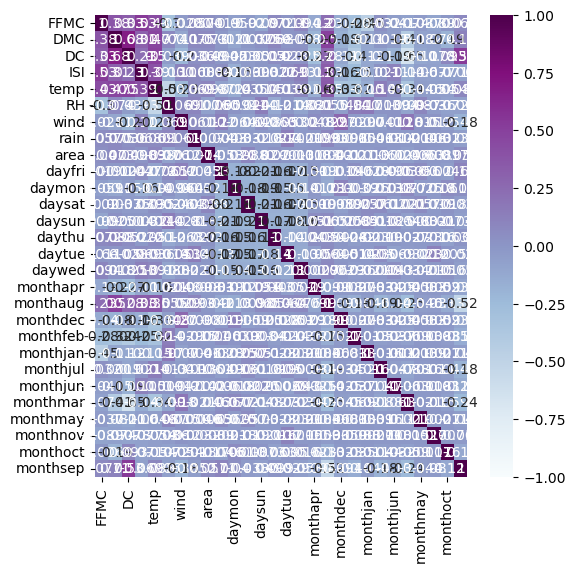

In [12]:
plt.figure(figsize=(6,6))
sns.heatmap(x.corr(),vmin=-1, vmax=1, annot=True,cmap='BuPu')
plt.show()

In [15]:
# for i in x.columns
#plt.figure(figsize=(2,2))
#print(".........{}.........".format(i))
#plt.scatter(x[i],y)
#plt.show()

In [16]:
# plt.figure(figsize=(8,8))
# sns.pairplot(x)
# plt.show()

lets build the model

In [17]:
def norm(i):
    return (i-i.min())/(i.max()-i.min())

In [18]:
x_norm=norm(x)

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x_norm,y,stratify=y,test_size=0.2,random_state=42)

In [21]:
y_train

26     small
351    large
82     small
266    small
113    small
       ...  
419    small
475    small
181    small
232    large
493    large
Name: size_category, Length: 413, dtype: object

In [22]:
svm_model=SVC(kernel='linear')
svm_model.fit(x_train,y_train)

SVC(kernel='linear')

In [23]:
train_pred=svm_model.predict(x_train)
test_pred=svm_model.predict(x_test)
print("__________________________")
print(accuracy_score(y_train,train_pred))
print(accuracy_score(y_test,test_pred))

__________________________
0.7506053268765133
0.7403846153846154


In [24]:
svm_model2=SVC()
param={'kernel':['linear','poly'],
      'gamma':[1,0.8,0.6,0.5,0.1,0.01],
      'C':[400,50,20,10,1,0.1,0.01,0.001]
      }
gsc=GridSearchCV(svm_model2,param,cv=10)
gsc.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [400, 50, 20, 10, 1, 0.1, 0.01, 0.001],
                         'gamma': [1, 0.8, 0.6, 0.5, 0.1, 0.01],
                         'kernel': ['linear', 'poly']})

In [25]:
gsc.best_score_

0.9054587688734032

In [26]:
gsc.best_params_

{'C': 400, 'gamma': 1, 'kernel': 'linear'}

In [27]:
svm_model3=SVC(kernel='poly',gamma=0.008,C=1)
svm_model3.fit(x_train,y_train)
train_pred=svm_model3.predict(x_train)
test_pred=svm_model3.predict(x_test)
print("__________________________")
print(accuracy_score(y_train,train_pred))
print(accuracy_score(y_test,test_pred))

__________________________
0.7312348668280871
0.7307692307692307


In [28]:
svm_model4=SVC(kernel='linear', gamma=0.1,C=750)
svm_model4.fit(x_train,y_train)
train_pred=svm_model4.predict(x_train)
test_pred=svm_model4.predict(x_test)
print("________________________")
print(accuracy_score(y_train,train_pred))
print(accuracy_score(y_test,test_pred))

________________________
0.9588377723970944
0.9230769230769231


## From the above we can say that the data is linearly separable so it is working better in 'linear' case with high 'C' value with test accuracy=92%